In [52]:
import numpy as np
import pickle
import random

In [53]:
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
training_data, test_data = data[0], data[2]

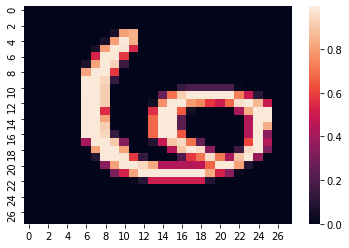

In [87]:
import seaborn as sns
sns.heatmap(test_data[54][0].reshape(28, 28))

In [54]:
np.random.seed(1000)
epochs = 30
eta = 5
n_input, n_hidden, n_output = 784, 30, 10
n = len(training_data)

biases = [ np.random.randn(n_hidden, 1), np.random.randn(n_output, 1) ]
weights = [ np.random.randn(n_hidden, n_input), np.random.randn(n_output, n_hidden) ]

In [55]:
def sigma(x):
    return(1 / (1 + np.exp(-x)))

def sigma_der(x):
    s = sigma(x)
    return s * (1 - s)

In [56]:
def forward(x):
    hidden_z = np.dot(weights[0], x) + biases[0]
    hidden_a = sigma(hidden_z)
    output_z = np.dot(weights[1], hidden_a) + biases[1]
    output_a = sigma(output_z)
    return hidden_z, hidden_a, output_z, output_a

In [57]:
forward(training_data[0][0])

(array([[ -3.90349967],
        [-16.67283193],
        [ 17.75858448],
        [ -5.97459672],
        [  5.5963784 ],
        [ -2.72450479],
        [ -1.5720064 ],
        [  8.53042832],
        [ -1.25026691],
        [ -6.40310439],
        [  7.38510994],
        [-19.83043971],
        [-14.65417038],
        [ -5.90930935],
        [-12.40353073],
        [  2.47770591],
        [  5.60777951],
        [ -2.11489185],
        [ 16.15066471],
        [  1.05127836],
        [-11.74600258],
        [-17.92882641],
        [ 15.47392599],
        [ -3.48378073],
        [-14.12762856],
        [  2.83579452],
        [ -0.46249458],
        [  0.70742438],
        [  0.40319137],
        [  2.54492151]]), array([[1.97723630e-02],
        [5.74223641e-08],
        [9.99999981e-01],
        [2.53607918e-03],
        [9.96302442e-01],
        [6.15427764e-02],
        [1.71930551e-01],
        [9.99802669e-01],
        [2.22653938e-01],
        [1.65366800e-03],
        [9.99379962

In [58]:
def backprop(x, y):
    nabla_b = [np.zeros(b.shape) for b in biases]
    nabla_w = [np.zeros(w.shape) for w in weights]
    
    hidden_z, hidden_a, output_z, output_a = forward(x)
    
    delta1 = (output_a - y) * sigma_der(output_z)
    nabla_b[1] = delta1
    nabla_w[1] = np.dot(delta1, hidden_a.T)
    
    delta2 = np.dot(weights[1].T, delta1) * sigma_der(hidden_z)
    nabla_b[0] = delta2
    nabla_w[0] = np.dot(delta2, x.T)
    
    return nabla_b, nabla_w

# Normal gradient descent

In [126]:
biases = [ np.random.randn(n_hidden, 1), np.random.randn(n_output, 1) ]
weights = [ np.random.randn(n_hidden, n_input), np.random.randn(n_output, n_hidden) ]
eta = 3
epoches = 100

for epoch in range(epoches):
    nabla_b = [np.zeros(b.shape) for b in biases]
    nabla_w = [np.zeros(w.shape) for w in weights]    
    
    for x, y in training_data:
        delta_b, delta_w = backprop(x, y)
        nabla_b = [nb + db for nb, db in zip(nabla_b, delta_b)]
        nabla_w = [nw + dw for nw, dw in zip(nabla_w, delta_w)]        
    
    biases = [b - eta / n * nb for b, nb in zip(biases, nabla_b)]
    weights = [w - eta / n * nw for w, nw in zip(weights, nabla_w)]
    
    s = 0
    for x, y in test_data:
        _, _, _, pred = forward(x)
        s += int(np.argmax(pred) == y)
    print("Epoch {} : {} / {}".format(epoch, s, len(test_data)))

Epoch 0 : 782 / 10000
Epoch 1 : 915 / 10000
Epoch 2 : 1005 / 10000
Epoch 3 : 1046 / 10000
Epoch 4 : 1097 / 10000
Epoch 5 : 1121 / 10000
Epoch 6 : 1149 / 10000
Epoch 7 : 1174 / 10000
Epoch 8 : 1201 / 10000
Epoch 9 : 1218 / 10000
Epoch 10 : 1245 / 10000
Epoch 11 : 1265 / 10000
Epoch 12 : 1293 / 10000
Epoch 13 : 1317 / 10000
Epoch 14 : 1337 / 10000
Epoch 15 : 1357 / 10000
Epoch 16 : 1372 / 10000
Epoch 17 : 1383 / 10000
Epoch 18 : 1401 / 10000
Epoch 19 : 1419 / 10000
Epoch 20 : 1428 / 10000
Epoch 21 : 1433 / 10000
Epoch 22 : 1441 / 10000
Epoch 23 : 1457 / 10000
Epoch 24 : 1471 / 10000
Epoch 25 : 1477 / 10000
Epoch 26 : 1487 / 10000
Epoch 27 : 1501 / 10000
Epoch 28 : 1515 / 10000
Epoch 29 : 1529 / 10000
Epoch 30 : 1534 / 10000
Epoch 31 : 1550 / 10000
Epoch 32 : 1563 / 10000
Epoch 33 : 1583 / 10000
Epoch 34 : 1598 / 10000
Epoch 35 : 1611 / 10000
Epoch 36 : 1613 / 10000
Epoch 37 : 1621 / 10000
Epoch 38 : 1635 / 10000
Epoch 39 : 1651 / 10000
Epoch 40 : 1659 / 10000
Epoch 41 : 1668 / 10000
Epoc

# Mini-batch

In [127]:
biases = [ np.random.randn(n_hidden, 1), np.random.randn(n_output, 1) ]
weights = [ np.random.randn(n_hidden, n_input), np.random.randn(n_output, n_hidden) ]

n = len(training_data)
mini_batch_size = 30
eta = 3
epoches = 100

for epoch in range(epoches):
    random.shuffle(training_data)
    mini_batches = [
        training_data[k:k+mini_batch_size] for k in range(0, n, mini_batch_size)]
    for mini_batch in mini_batches:
        nabla_b = [np.zeros(b.shape) for b in biases]
        nabla_w = [np.zeros(w.shape) for w in weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(weights, nabla_w)]
        biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(biases, nabla_b)]
    
    s = 0
    wrong = []
    for i,(x, y) in enumerate(test_data):
        _, _, _, pred = forward(x)
        s += int(np.argmax(pred) == y)
        if int(np.argmax(pred)!=y): wrong.append([pred, i])
    print("Epoch {} : {} / {}".format(epoch, s, len(test_data)))    


Epoch 0 : 8826 / 10000
Epoch 1 : 9067 / 10000
Epoch 2 : 9177 / 10000
Epoch 3 : 9223 / 10000
Epoch 4 : 9295 / 10000
Epoch 5 : 9309 / 10000
Epoch 6 : 9350 / 10000
Epoch 7 : 9342 / 10000
Epoch 8 : 9379 / 10000
Epoch 9 : 9398 / 10000
Epoch 10 : 9409 / 10000
Epoch 11 : 9438 / 10000
Epoch 12 : 9415 / 10000
Epoch 13 : 9426 / 10000
Epoch 14 : 9434 / 10000
Epoch 15 : 9418 / 10000
Epoch 16 : 9429 / 10000
Epoch 17 : 9446 / 10000
Epoch 18 : 9439 / 10000
Epoch 19 : 9452 / 10000
Epoch 20 : 9448 / 10000
Epoch 21 : 9465 / 10000
Epoch 22 : 9453 / 10000
Epoch 23 : 9468 / 10000
Epoch 24 : 9455 / 10000
Epoch 25 : 9467 / 10000
Epoch 26 : 9465 / 10000
Epoch 27 : 9486 / 10000
Epoch 28 : 9472 / 10000
Epoch 29 : 9469 / 10000
Epoch 30 : 9492 / 10000
Epoch 31 : 9475 / 10000
Epoch 32 : 9486 / 10000
Epoch 33 : 9471 / 10000
Epoch 34 : 9475 / 10000
Epoch 35 : 9484 / 10000
Epoch 36 : 9463 / 10000
Epoch 37 : 9466 / 10000
Epoch 38 : 9478 / 10000
Epoch 39 : 9484 / 10000
Epoch 40 : 9470 / 10000
Epoch 41 : 9471 / 10000
Ep

In [ ]:
class Network:
    
    def __init__(self, layers_size, training_data, epoches=100, eta=3):
        self.layers = layers_size
        self.biases = [np.random.randn(i).reshape(i, 1) for i in layers_size[1:]]
        self.weights = [np.random.randn(layers_size[i], layers_size[i-1]) for i in range(1, len(layers_size))]
        self.epoches = epoches
        self.eta = eta
        self.training_data = training_data
    
    def forward_pass(self, x):
        self.z = []
        last_a = x
        self.a = [last_a]
        
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, last_a) + b
            self.z.append(z)
            last_a = self.sigma(z)
            self.a.append(last_a)
    
    
    def backprop(self, x, y):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]

        self.forward_pass(x)

        delta = (self.a[-1] - y) * sigma_der(self.z[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, self.a[-2].T())

        for l in range(2, len(self.layers)):
            delta = np.dot(self.weights[-l+1].T(), delta) * self.sigma_der(self.z[-l])
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, self.a[-l-1].T())
        return (nabla_b, nabla_w)

    
    def sigma(self, z):
        return(1 / (1 + np.exp(-z)))
    
    def sigma_der(self, z):
        s = self.sigma(z)
        return s * (1 - s)
    
    def SGD(self, mini_batch_size=30):
        for epoch in range(self.epoches):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size] for k in range(0, len(training_data), mini_batch_size)]
            for mini_batch in mini_batches:
                nabla_b = [np.zeros(b.shape) for b in self.biases]
                nabla_w = [np.zeros(w.shape) for w in self.weights]
                for x, y in mini_batch:
                    delta_nabla_b, delta_nabla_w = self.backprop(x, y)
                    nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
                    nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
                self.weights = [w-(self.eta/len(mini_batch))*nw
                                for w, nw in zip(self.weights, nabla_w)]
                self.biases = [b-(self.eta/len(mini_batch))*nb
                               for b, nb in zip(self.biases, nabla_b)]
  
            s = 0
            for i,(x, y) in enumerate(test_data):
                self.forward_pass(x)
                s += int(np.argmax(self.a[-1]) == y)
            print("Epoch {} : {} / {}".format(epoch, s, len(test_data)))    
    

In [181]:
net = Network([784, 30, 10], training_data, eta=3)
net.SGD()

Epoch 0 : 8775 / 10000
Epoch 1 : 9041 / 10000
Epoch 2 : 9133 / 10000
Epoch 3 : 9218 / 10000
Epoch 4 : 9249 / 10000
Epoch 5 : 9277 / 10000
Epoch 6 : 9313 / 10000
Epoch 7 : 9304 / 10000
Epoch 8 : 9333 / 10000
Epoch 9 : 9342 / 10000
Epoch 10 : 9369 / 10000
Epoch 11 : 9356 / 10000
Epoch 12 : 9390 / 10000
Epoch 13 : 9397 / 10000
Epoch 14 : 9416 / 10000
Epoch 15 : 9405 / 10000
Epoch 16 : 9411 / 10000
Epoch 17 : 9408 / 10000
Epoch 18 : 9391 / 10000
Epoch 19 : 9422 / 10000
Epoch 20 : 9418 / 10000
Epoch 21 : 9415 / 10000
Epoch 22 : 9427 / 10000
Epoch 23 : 9434 / 10000
Epoch 24 : 9440 / 10000
Epoch 25 : 9436 / 10000
Epoch 26 : 9429 / 10000
Epoch 27 : 9435 / 10000
Epoch 28 : 9430 / 10000
Epoch 29 : 9441 / 10000
Epoch 30 : 9431 / 10000
Epoch 31 : 9435 / 10000
Epoch 32 : 9435 / 10000
Epoch 33 : 9438 / 10000
Epoch 34 : 9422 / 10000
Epoch 35 : 9454 / 10000
Epoch 36 : 9445 / 10000
Epoch 37 : 9443 / 10000
Epoch 38 : 9444 / 10000
Epoch 39 : 9466 / 10000
Epoch 40 : 9448 / 10000
Epoch 41 : 9444 / 10000
Ep